# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1408.
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           3.01e-45
Time:                        10:51:49   Log-Likelihood:                 10.173
No. Observations:                  50   AIC:                            -12.35
Df Residuals:                      46   BIC:                            -4.697
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9430      0.070     70.458      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.43987668  4.9314723   5.38272628  5.765529    6.06191545  6.26701683
  6.38986051  6.45188682  6.48342646  6.51871731  6.59027917  6.7235709
  6.93280759  7.21862505  7.56797534  7.95627054  8.35142245  8.71911461
  9.02844038  9.25698082  9.39448806  9.44456899  9.42409267  9.36041878
  9.28690251  9.23741438  9.24077545  9.31602204  9.46927817  9.69274938
  9.96600334 10.2593268  10.53860745 10.77093842 10.93002481 11.00050387
 10.98046905 10.88178323 10.72812972 10.5511211  10.38510543 10.2615229
 10.20374034 10.22321209 10.3175981  10.47114837 10.65729067 10.84299624
 10.99420636 11.08142807]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.07267382 10.92797588 10.66756125 10.33752468  9.99854307  9.71101968
  9.52029526  9.44554709  9.4750937   9.56925488]


## Plot comparison

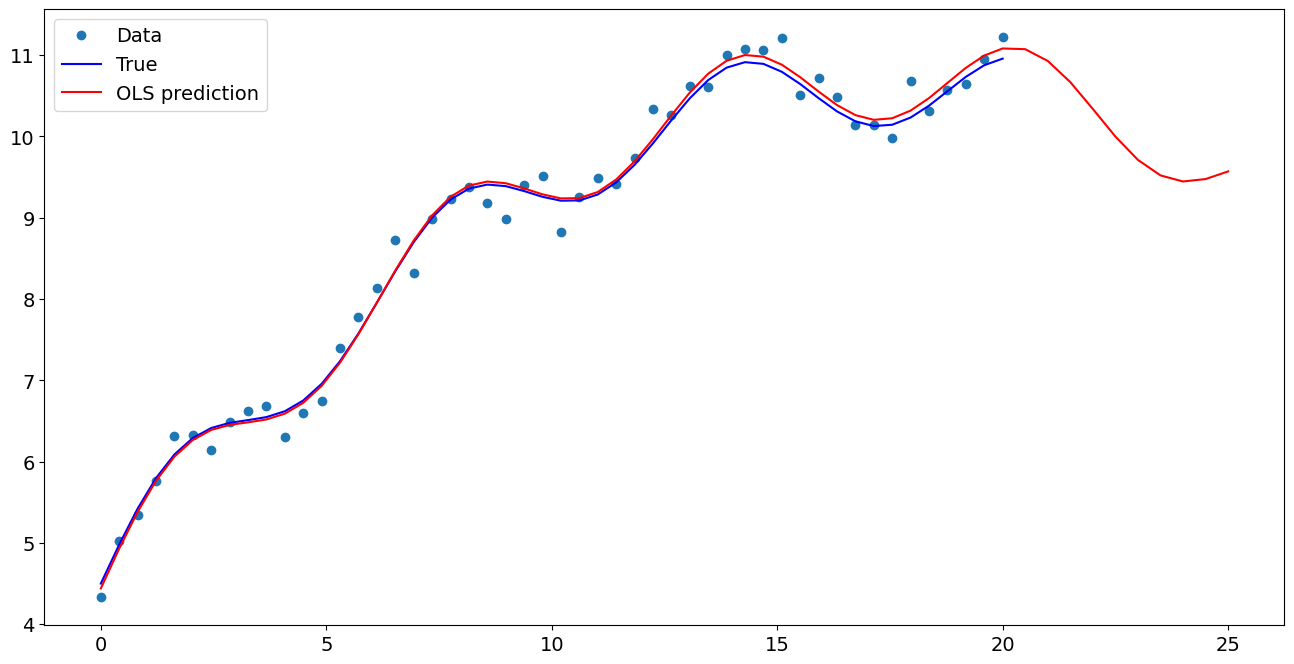

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.943016
x1                  0.509789
np.sin(x1)          0.515781
I((x1 - 5) ** 2)   -0.020126
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.072674
1    10.927976
2    10.667561
3    10.337525
4     9.998543
5     9.711020
6     9.520295
7     9.445547
8     9.475094
9     9.569255
dtype: float64